In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

PermissionError: [Errno 1] Operation not permitted

In [4]:
#データ読み込み
df = pd.read_csv("../data/train.csv")
df

NameError: name 'pd' is not defined

In [3]:
#欠損値の削除
df = df.dropna()
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
#欠損値有無の確認

is_null = df.isnull()
null_counts = is_null.sum()
null_counts

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [5]:
#Class毎に抽出する

df_Busi = df.query('Class == "Business"')
df_Eco = df.query('Class == "Eco"')
df_Plus = df.query(' Class == "Plus"')

In [6]:
#id,unnamed,class,satisfaction 不要な列を消す

df_Busi_del = df_Busi.drop(['id','Unnamed: 0','satisfaction','Class'], axis=1)
df_Eco_del = df_Eco.drop(['id','Unnamed: 0','satisfaction','Class'], axis=1)
df_Plus_del = df_Plus.drop(['id','Unnamed: 0','satisfaction','Class'], axis=1)

In [7]:
# One-hot encodingを実行する

df_Busi_enc = pd.get_dummies(df_Busi_del, dtype=int,drop_first=True)
df_Eco_enc = pd.get_dummies(df_Eco_del, dtype=int,drop_first=True)
df_Plus_enc = pd.get_dummies(df_Plus_del, dtype=int,drop_first=True)

In [8]:
df_Busi_enc

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
1,25,235,3,2,3,3,1,3,1,1,...,5,3,1,4,1,1,6.0,1,1,0
2,26,1142,2,2,2,2,5,5,5,5,...,3,4,4,4,5,0,0.0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,...,5,3,1,4,2,11,9.0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,4,4,3,3,3,0,0.0,1,0,0
7,52,2035,4,3,4,4,5,5,5,5,...,5,5,4,5,4,4,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103894,26,712,4,4,4,4,5,5,5,5,...,4,4,3,4,5,17,26.0,1,0,0
103897,60,1599,5,5,5,5,5,5,4,4,...,4,4,4,4,4,9,7.0,0,0,0
103900,49,2347,4,4,4,4,2,4,5,5,...,5,5,5,5,4,0,0.0,1,0,0
103901,30,1995,1,1,1,3,4,1,5,4,...,2,4,5,5,4,7,14.0,1,1,0


## t-SNEの実行

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [10]:
ss = StandardScaler()
df_Busi_enc_ss = ss.fit_transform(df_Busi_enc)

In [11]:
df_Busi_satis_enc = pd.get_dummies(df_Busi, dtype=int,drop_first=True)
df_Busi_satis_enc

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied
1,1,5047,25,235,3,2,3,3,1,3,...,3,1,4,1,1,6.0,1,1,0,0
2,2,110028,26,1142,2,2,2,2,5,5,...,4,4,4,5,0,0.0,0,0,0,1
3,3,24026,25,562,2,5,5,5,2,2,...,3,1,4,2,11,9.0,0,0,0,0
4,4,119299,61,214,3,3,3,3,4,5,...,4,3,3,3,0,0.0,1,0,0,1
7,7,96462,52,2035,4,3,4,4,5,5,...,5,4,5,4,4,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103894,103894,86549,26,712,4,4,4,4,5,5,...,4,3,4,5,17,26.0,1,0,0,1
103897,103897,102203,60,1599,5,5,5,5,5,5,...,4,4,4,4,9,7.0,0,0,0,1
103900,103900,73097,49,2347,4,4,4,4,2,4,...,5,5,5,4,0,0.0,1,0,0,1
103901,103901,68825,30,1995,1,1,1,3,4,1,...,4,5,5,4,7,14.0,1,1,0,0


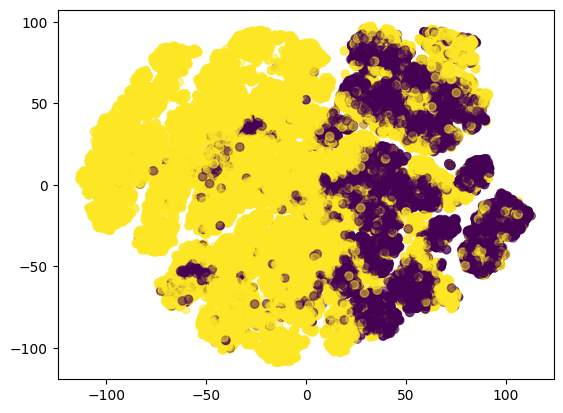

In [40]:
tsne = TSNE(n_components=2, perplexity=20)
y = tsne.fit_transform(df_Busi_enc_ss)
plt.scatter(y[:,0], y[:,1], c=df_Busi_satis_enc.satisfaction_satisfied, alpha=0.5)
plt.show()

In [14]:
df_sample = df.sample(n=1000, random_state=12)

In [21]:
df_sam_Busi = df_sample.query('Class == "Business"')
df_sam_Busi_del = df_sam_Busi.drop(['id','Unnamed: 0','satisfaction','Class'], axis=1)
df_sam_Busi_enc = pd.get_dummies(df_sam_Busi_del, dtype=int,drop_first=True)

df_sam_Busi_del_2 = df_sam_Busi.drop(['id','Unnamed: 0','Class'], axis=1)
df_sam_Busi_satis_enc = pd.get_dummies(df_sam_Busi_del_2, dtype=int,drop_first=True)

df_sam_Busi_enc_ss = ss.fit_transform(df_sam_Busi_enc)

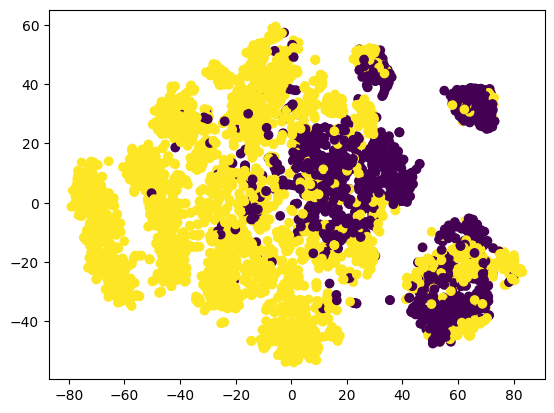

In [39]:
tsne = TSNE(n_components=2, perplexity=30)
y = tsne.fit_transform(df_sam_Busi_enc_ss)
plt.scatter(y[:,0], y[:,1], c=df_sam_Busi_satis_enc.satisfaction_satisfied)
plt.show()

In [ ]:
import plotly.graph_objects as go

x = df_Plus_enc_2d[:, 0]
y = df_Plus_enc_2d[:, 1]
z = df_Plus_enc_2d[:, 2]

# 3D散布図の作成
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])

# グラフのレイアウト設定
fig.update_layout(scene=dict(
    xaxis_title='X',
    yaxis_title='Y',
    zaxis_title='Z'
))
# グラフのレイアウト設定（幅と高さの指定）
fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    width=800,  # 幅の設定（ピクセル単位）
    height=800  # 高さの設定（ピクセル単位）
)

# グラフの表示
fig.show()

##　デンドログラム

In [36]:
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [40]:
df_Busi_feat_enc = pd.get_dummies(df_Busi[features], dtype=int,drop_first=True)
df_Busi_feat_enc_ss = ss.fit_transform(df_Busi_feat_enc)

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
result = linkage(df_Busi_feat_enc_ss, method='ward')
dendrogram(result)
plt.show()

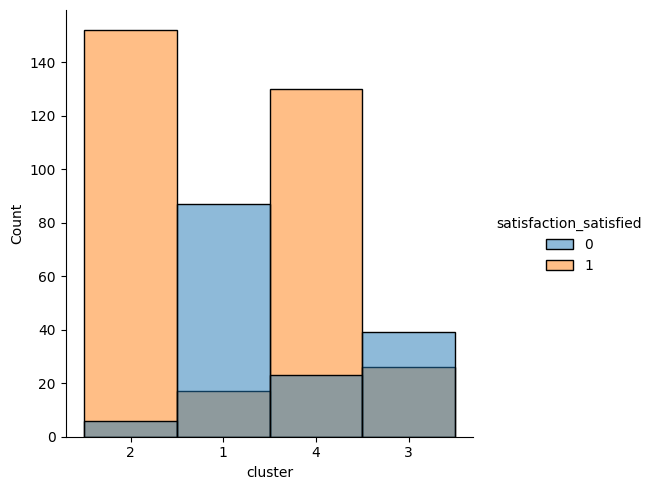

In [26]:
cluster = fcluster(result, t=35, criterion='distance')

new_df = df_sam_Busi_satis_enc.assign(cluster = cluster)
new_df['cluster'] = new_df['cluster'].astype('str')
sns.displot(new_df, x='cluster', hue='satisfaction_satisfied', kind='hist')
plt.show()

In [32]:
new_df.query('cluster == "2"').describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,satisfaction_satisfied
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0,158.0,158.000000
mean,43.639241,1935.613924,1.841772,1.753165,2.025316,1.860759,3.569620,4.253165,4.265823,4.392405,...,4.303797,3.759494,4.291139,3.854430,4.987342,4.664557,0.474684,0.0,0.0,0.962025
std,11.434231,1106.452147,0.913607,0.826987,1.088149,0.809721,1.164042,0.930288,0.824912,0.694248,...,0.893778,1.175278,0.839349,1.075648,10.477752,10.761817,0.500946,0.0,0.0,0.191743
min,9.000000,67.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,36.000000,919.750000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,44.000000,1900.500000,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.500000,...,5.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
75%,52.750000,2852.750000,2.000000,2.000000,2.750000,2.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,2.750000,1.000000,0.0,0.0,1.000000
max,74.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,51.000000,61.000000,1.000000,0.0,0.0,1.000000


In [ ]:
#年齢別
business['decade'] =business['Age'].astype('str').apply(lambda x:x[0][0]).apply(lambda x: x+ '0s')

import matplotlib.pyplot as plt

# 年代の順序を指定
decade_order = ['10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']

counts = business['decade'].value_counts().reindex(decade_order)
plt.bar(x=counts.index, height=counts.values)
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Distribution of Decade - Dataset 0')

# 数値を表示
for i, count in enumerate(counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()